# PREDICTING DIABETES WITH DATA

# 1. Introduction

Diabetes is a group of metabolic disorders characterized by a high blood sugar level over a prolonged period of time. Symptoms often include frequent urination, increased thirst, and increased appetite. If left untreated, diabetes can cause many health problems.

The objective of this project is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. This analysis will use various Machine Learning Classification Algorithms to classify individuals for likelihood of developing diabetes. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.


# 2. Load Libraries and Data

In [100]:
## Load libraries needed to do the analysis
import pandas as pd  # This is for data processing and reading CSV files
import numpy as np # This is to use linear algebra
import matplotlib.pyplot as plt # This is for plotting graphs
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go # This is for plotting
import itertools # This is for handling iterations and loops
plt.style.use('fivethirtyeight')
import seaborn as sns # This is Python data visualization library
import warnings # This is to import non-fatal alert messages
warnings.filterwarnings('ignore') # filter warnings

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn import svm

import os # This allows python to use functions that depend on the Operating System
print(os.listdir("C:/Users/cchsu/Documents/UC Davis/BAX-453-1-AppDomains/HW1/Data"))

['diabetes.csv']


In [101]:
# Read the CSV file into the object "data"
data = pd.read_csv("C:/Users/cchsu/Documents/UC Davis/BAX-453-1-AppDomains/HW1/diabetes.csv")


# 3. Explore the Data

## 3.1 Examining the Attributes in the Data

In [102]:
# Look at the first 6 rows of the data
data.head(n=6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [103]:
# Divide the data into those with Diabetes ("=1") and those with No Diabetes ("=0")
p = data[data.Outcome == 1]
n = data[data.Outcome == 0]

In [104]:
# Normalize the Data

y = data['Outcome'].values.reshape(-1,1)  # Dependent Features (Class)
x_data = data.drop(['Outcome'],axis=1)    # Independent Features

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)) # normalized

# Normalization usually means to scale a variable to have a values between 0 and 1, while standardization transforms data to 
# have a mean of zero and a standard deviation of 1. This standardization is called a z-score, and data points can be 
# standardized with the following formula: 
# Normalized Data / Normalization

x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


## 3.2 Visualizing the Data

<function matplotlib.pyplot.show(*args, **kw)>

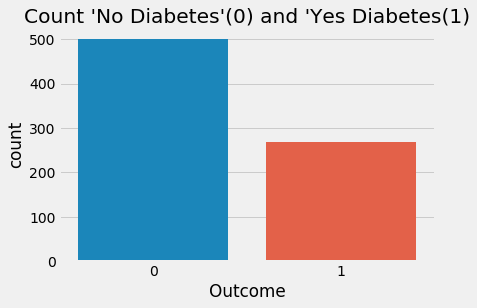

In [105]:
sns.countplot(x='Outcome',data=data)
plt.title("Count 'No Diabetes'(0) and 'Yes Diabetes(1)")
plt.show

## 3.3 Analyzing the Cases WITH Diabetes

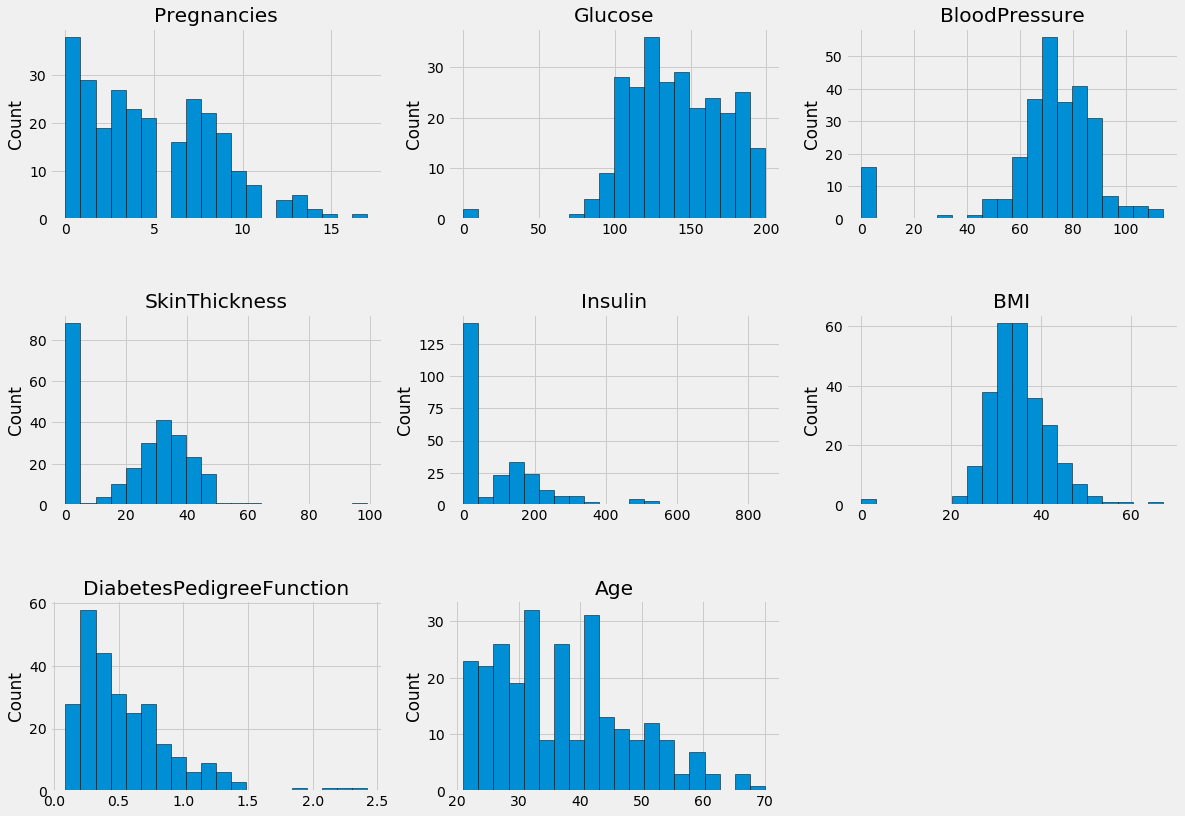

In [106]:
# Overall Analysis

data1 = data[data["Outcome"]==1]
columns = data.columns[:8] # this puts the column labels 0-7 into "columns"
plt.subplots(figsize=(18,18))
length = len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

## 3.4 Analyzing Cases WITHOUT Diabetes

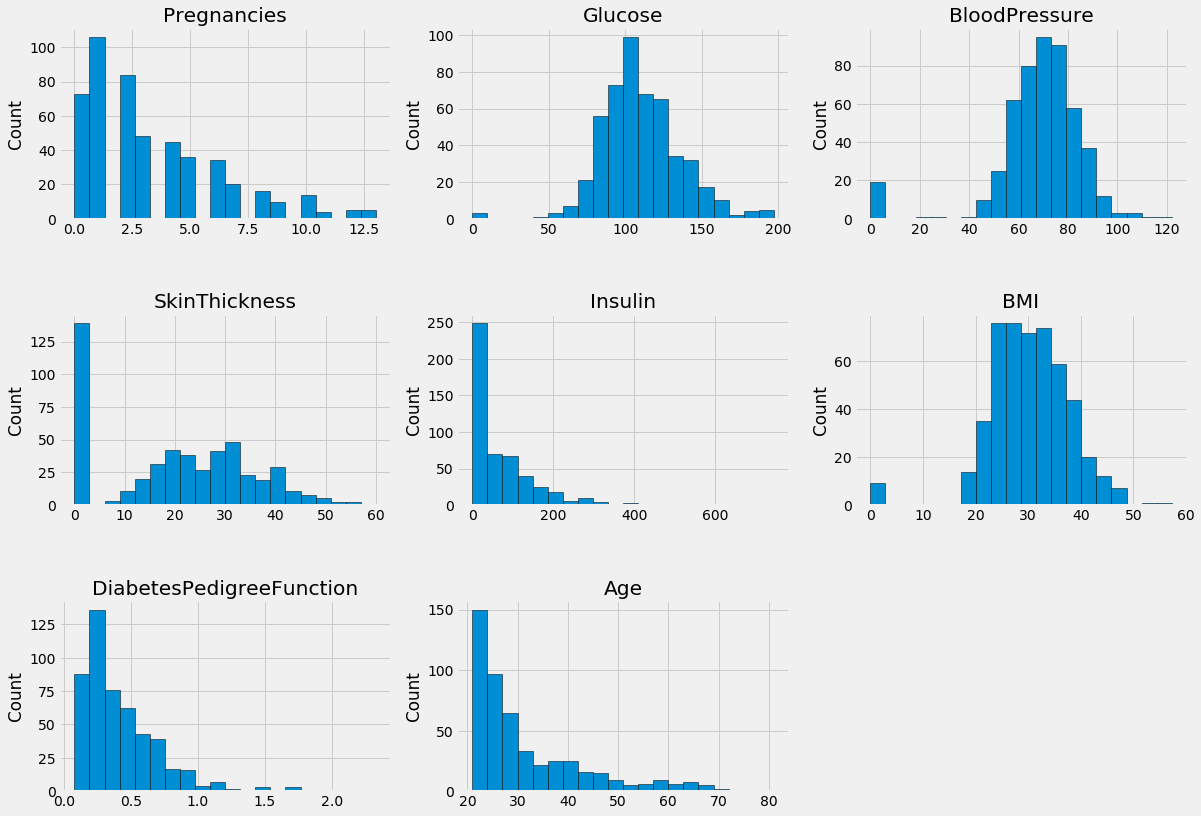

In [205]:
# Overall Analysis

data1 = data[data["Outcome"]==0]
columns = data.columns[:8] # this puts the column labels 0-7 into "columns"
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

# Graph below: "Diabetes pedigree function" = a function which scores likelihood of diabetes based on family history

## 3.5 Visualizing the Data: Glucose vs Pregnancies

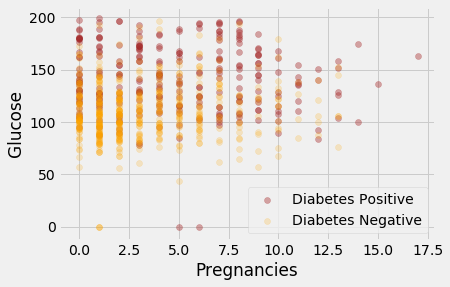

In [108]:
# Visualize the Data with a Scatter Plot: Glucose vs Pregnancies

plt.scatter(p.Pregnancies,p.Glucose,color = "brown",label="Diabetes Positive",alpha=0.4)
plt.scatter(n.Pregnancies,n.Glucose,color = "Orange",label="Diabetes Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()

# We appear to see there is clear segregation.

## 3.6 Visualizing the Data: Pregnancies vs Age

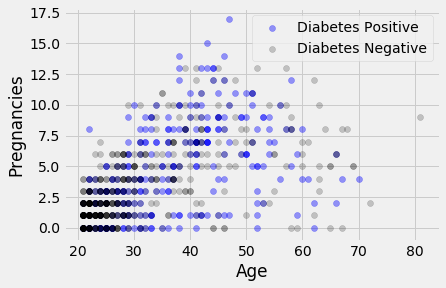

In [109]:
#Visualize the data with a scatter plot: Pregnancies vs Age

plt.scatter(p.Age,p.Pregnancies,color = "blue",label="Diabetes Positive",alpha=0.4)
plt.scatter(n.Age,n.Pregnancies,color = "black",label="Diabetes Negative",alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend()
plt.show()

# We appear to see there is clear segregation.

## 3.7 Visualizing the Data: Insulin vs Glucose

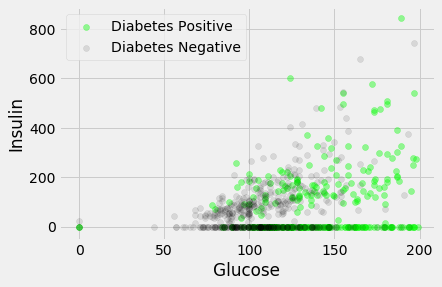

In [110]:
#Visualize the data with a scatter plot: Insulin vs Glucose

plt.scatter(p.Glucose,p.Insulin,color = "lime",label="Diabetes Positive",alpha=0.4)
plt.scatter(n.Glucose,n.Insulin,color = "black",label="Diabetes Negative",alpha=0.1)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

# We appear to see there is clear segregation.

# 4. Compare Machine Learning Classification Models

## 4.1 Separating the Dataset into Features ("X variables") and Labels "Y variables")

In [111]:
y = data.Outcome.values
x1 = data.drop(["Outcome"], axis=1) #we remove the diagnosis of Diabetes ("Outcome") for prediction

In [112]:
#normalization
x = (x1-np.min(x1))/(np.max(x1)-np.min(x1))

## 4.2 Splitting the Dataset into Train and Test sets

In [113]:
#Split the data into a Training set and Testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

## 4.3 Using Logistic Regression Classification

In [114]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [115]:
# Perform a K-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR, X=xtrain, y=ytrain, cv=10)
print("Average Accuracies: ",np.mean(accuracies))
print("Standard Deviation Accuracies: ",np.std(accuracies))

Average Accuracies:  0.7597309573724669
Standard Deviation Accuracies:  0.048042503645836995


In [135]:
model_LR = LR.fit(xtrain,ytrain)
print("Test Accuracy {}".format(LR.score(xtest,ytest)))

LRscore = LR.score(xtest,ytest)

Test Accuracy 0.7445887445887446


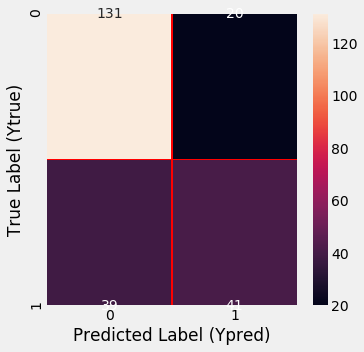

In [117]:
# Create the Confusion Matrix

yprediction1 = LR.predict(xtest)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediction1)

# Confusion matrix visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5, linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Label (Ypred)")
plt.ylabel("True Label (Ytrue)")
plt.show()

## 4.4 Using K-Nearest Neighbors (KNN) Classification

In [118]:
# Create-KNN-model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 40) #n_neighbors = K value

In [180]:
# Perform K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = KNN, X= xtrain, y=ytrain, cv=10)
print("Average Accuracies: ",np.mean(accuracies))
print("Standard Deviation Accuracies: ",np.std(accuracies))

Average Accuracies:  0.7430642907058
Standard Deviation Accuracies:  0.04635631896148519


In [182]:
model_KNN = KNN.fit(xtrain,ytrain) #learning model
prediction = KNN.predict(xtest)
#Prediction
print("{}-NN Score: {}".format(40,KNN.score(xtest,ytest)))

KNNscore = KNN.score(xtest,ytest)

40-NN Score: 0.7532467532467533


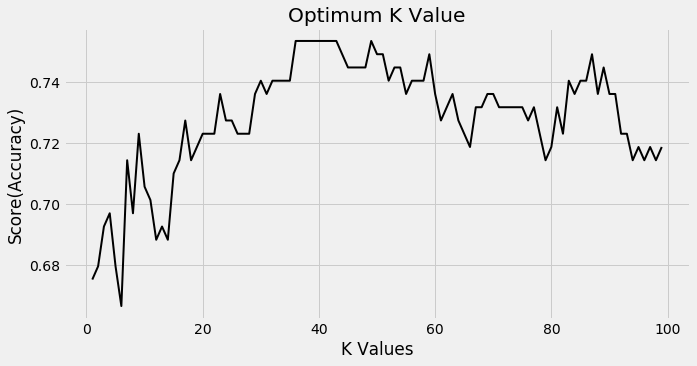

In [121]:
# Find the Optimum value for K. (K is the number of neighbors we should consider.)
scores = []
for each in range(1,100):
    KNNfind = KNeighborsClassifier(n_neighbors = each)
    KNNfind.fit(xtrain,ytrain)
    scores.append(KNNfind.score(xtest,ytest))

plt.figure(1, figsize=(10, 5))
plt.plot(range(1,100),scores,color="black",linewidth=2)
plt.title("Optimum K Value")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

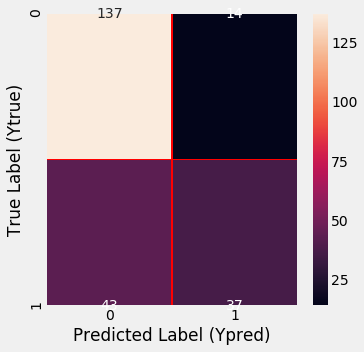

In [122]:
# Confusion Matrix for K-Nearest Neighbors Model

yprediction2= KNN.predict(xtest)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediction2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Label (Ypred)")
plt.ylabel("True Label (Ytrue)")
plt.show()

## 4.5 Using Support Vector Machines (SVM) Classification

In [123]:
# Support Vector Machines with Sklearn

from sklearn.svm import SVC
SVM = SVC(random_state=42)

In [124]:
# K-Fold Cross Validation for Support Vector Machines

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SVM, X= xtrain, y=ytrain, cv=10)
print("Average Accuracies: ",np.mean(accuracies))
print("Standard Deviation Accuracies: ",np.std(accuracies))

Average Accuracies:  0.7596597323012417
Standard Deviation Accuracies:  0.03903076018788738


In [125]:
# Support Vector Machines Learning
modelSVMLinear = svm.SVC(kernel='linear', probability=True)
model_SVMLinear2 = modelSVMLinear.fit(xtrain,ytrain)   

# Support Vector Machines Testing 
print ("SVM Accuracy:", model_SVMLinear2.score(xtest,ytest))

SVMscore = model_SVMLinear2.score(xtest,ytest)

SVM Accuracy: 0.7532467532467533


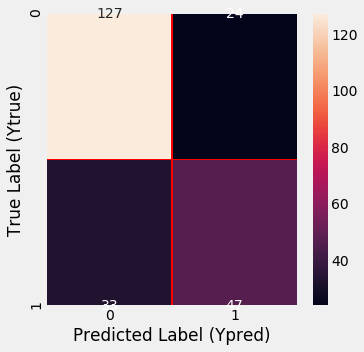

In [126]:
# Confusion Matrix for Support Vector Machines

yprediction3= model_SVMLinear2.predict(xtest)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediction3)

# CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Label (Ypred)")
plt.ylabel("True Label (Ytrue)")
plt.show()

## 4.6 Using Decision Tree Classification

In [138]:
# Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(xtrain,ytrain) # use the xtrain and ytrain values to train the model

# prediction
print("Decision Tree Score: ",DTC.score(xtest,ytest))

DTscore = DTC.score(xtest,ytest)

Decision Tree Score:  0.6883116883116883


## 4.7 Using Random Forest Classification

In [128]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators =  24, random_state=42) #n_estimator = Decision Tree

In [129]:
# K-Fold Cross Validation for Random Forest Classifier

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=RFC, X=xtrain, y=ytrain, cv=10)
print("Average Accuracies: ",np.mean(accuracies)) # calc the mean using the array "accuracies"
print("Standard Deviation Accuracies: ",np.std(accuracies)) # calc the standard deviation using the array "accuracies"

Average Accuracies:  0.7597296135031985
Standard Deviation Accuracies:  0.04205510294460587


In [130]:
# Random Forest Classifier Learning
model_RF = RFC.fit(xtrain,ytrain) 
print("Random Forest Score: ",RFC.score(xtest,ytest))
RFCscore=RFC.score(xtest,ytest)

Random Forest Score:  0.7705627705627706


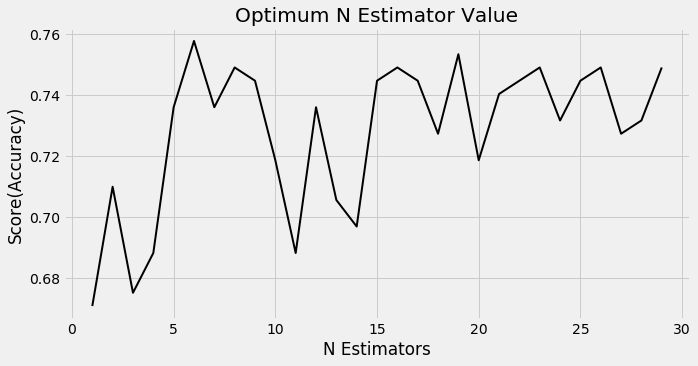

In [131]:
# Find Optimum K value
scores = [] # create an empty list called "scores"
for each in range(1,30):
    RFfind = RandomForestClassifier(n_estimators = each)
    RFfind.fit(xtrain,ytrain)
    scores.append(RFfind.score(xtest,ytest))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,30),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

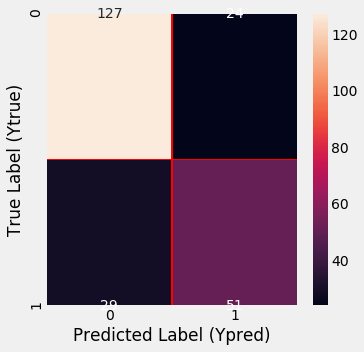

In [132]:
# Confusion Matrix for the Random Forest

yprediction6= RFC.predict(xtest)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediction6)

# Confusion Matrix visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Label (Ypred)")
plt.ylabel("True Label (Ytrue)")
plt.show()

## 4.8 Model Summary

In [141]:
# Initialise data of lists
data1 = {'Model':['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machines', 'Decision Tree', 'Random Forest'],
          'Accuracy Score':[LRscore, KNNscore, SVMscore, DTscore, RFCscore]}

# Create the DataFrame
model_summary = pd.DataFrame(data1, index=[1,2,3,4,5])
model_summary

,Model,Accuracy Score
1,Logistic Regression,0.744589
2,K-Nearest Neighbors,0.753247
3,Support Vector Machines,0.753247
4,Decision Tree,0.688312
5,Random Forest,0.770563


### The Decision Tree accuracy is the worst of all the models. So GridSearchCV will not be applied to it in the next section.

# 5. Apply GridSearchCV to find the best hyperparameters for the Machine Learning Classifications

## 5.1 Applying GridSearchCV to find best hyperparameters for Logistic Regression

In [165]:
# Use GridSearchCV for Logistic Regression
mdl = LogisticRegression()

# prepare a range of values to test
param_grid = [
  {'C': [0.99,0.1,1,10]}
 ]

grid1 = GridSearchCV(estimator=mdl, param_grid=param_grid,cv=5)
grid1.fit(xtrain, ytrain)
# summarize the results of the grid search
print("Best score for logistic regression : ",round(100*grid1.best_score_,2),"%")
print("Best estimator for logistic regression parameter C : ",grid.best_estimator_.C)

LR_BestScore = round(grid1.best_score_,6)

Best score for logistic regression :  77.47 %
Best estimator for logistic regression parameter C :  0.99


## 5.2 Applying GridSearchCV to find best hyperparameters for K Nearest Neighbors (KNN)

In [198]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)

#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(xtrain,ytrain)

#print(grid.grid_scores_)
'''
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)
'''

print ("Best score for K-Nearest Neighbors : ",round(100*grid.best_score_,2), "%")
print (grid.best_params_)
print (grid.best_estimator_)

KNN_BestScore = round(grid.best_score_,6)

Best score for K-Nearest Neighbors :  76.91 %
{'n_neighbors': 23, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='distance')


## 5.3 Applying GridSearchCV to find best hyperparameters for Support Vector Machines (SVM)
### 5.3.1 GridSearchCV - SVM - Method 1

In [156]:
# GridSearchCV - SVM - Method 1
lin_svc = SVC(kernel='linear',C=10)
lin_svc.fit(x,y)
lin_svc_result = cross_validate(lin_svc,x, y, cv=5,scoring='accuracy',return_train_score=True)
print("Cv:5, Test Score: {}".format(lin_svc_result['test_score']))
print("Cv:5, Train Score: {}".format(lin_svc_result['train_score']))

accuracy = cross_val_score(lin_svc,x,y,cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (accuracy.mean(),accuracy.std() * 2))

f1 = cross_val_score(lin_svc,x,y,cv=5,scoring='f1')
print('F1 Score : ',f1)

mse = cross_val_score(lin_svc,x,y,cv=5,scoring='neg_mean_squared_error')
print('Negative Mean Squared Error: ', mse)
print("Cv = 5, recall = ",cross_val_score(lin_svc, x, y, scoring='recall'))
print("Cv = 5, precision = ",cross_val_score(lin_svc, x, y, scoring='precision'))

Cv:5, Test Score: [0.75324675 0.75974026 0.75324675 0.81045752 0.75163399]
Cv:5, Train Score: [0.77850163 0.7752443  0.78175896 0.76585366 0.7804878 ]
Accuracy: 0.7657 (+/- 0.0451)
F1 Score :  [0.60416667 0.64761905 0.58695652 0.69473684 0.57777778]
Negative Mean Squared Error:  [-0.24675325 -0.24025974 -0.24675325 -0.18954248 -0.24836601]
Cv = 5, recall =  [0.6        0.53932584 0.52808989]
Cv = 5, precision =  [0.6835443  0.63157895 0.79661017]


### 5.3.2 GridSearchCV - SVM - Method 2

In [86]:
# GridSearchCV - SVM - Method 2
mdl = svm.SVC()

# prepare a range of values to test
param_grid = [
  {'C': [0.99,0.1,1,10], 'kernel': ['linear']}
 ]

grid = GridSearchCV(estimator=mdl, param_grid=param_grid,cv=5,scoring='precision')
grid.fit(xtrain, ytrain)

# summarize the results of the grid search
print("Best score Support Vector Machines : ",round(100*grid.best_score_,2),"%")
print("Best estimator for Support Vector Machines parameter C : ",grid.best_estimator_.C)

Best score Support Vector Machines :  76.14 %
Best estimator for Support Vector Machines parameter C :  0.99


### 5.3.3 GridSearchCV - SVM - Method 3

In [201]:
from sklearn.svm import SVC
param_grid = { 'C' : [0.001, 0.01, 0.1, 1, 10, 20]}
svm_linear = SVC(kernel="linear")
svm_gscv0 = GridSearchCV(svm_linear,param_grid=param_grid)
svm_gscv0.fit(xtrain,ytrain)

print("Tuned best parameters for kernel linear svm: ",svm_gscv0.best_params_ ) 
print("Best score: {}".format(svm_gscv0.best_score_))

SVM_BestScore = round(svm_gscv0.best_score_,6)

Tuned best parameters for kernel linear svm:  {'C': 10}
Best score: 0.776536312849162


## 5.4 Applying GridSearchCV to find best hyperparameters for Random Forest

### 5.4.1 GridSearch CV - Random Forest - Method 1

In [157]:
rftree = RandomForestClassifier(criterion='entropy',max_depth=4,n_estimators=100,max_features='auto',random_state=1)
rftree.fit(x,y)
rftree_result = cross_validate(rftree,x, y, cv=5,scoring='accuracy',return_train_score=True)
print("Cv:5, Test Score: {}".format(rftree_result['test_score']))
print("Cv:5, Train Score: {}".format(rftree_result['train_score']))

accuracy = cross_val_score(rftree,x,y,cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (accuracy.mean(),accuracy.std() * 2))

f1 = cross_val_score(rftree,x,y,cv=5,scoring='f1')
print('F1 Score : ',f1)

mse = cross_val_score(rftree,x,y,cv=5,scoring='neg_mean_squared_error')
print('Negative Mean Squared Error: ', mse)
print("Cv = 5, recall = ",cross_val_score(rftree, x, y, scoring='recall'))
print("Cv = 5, precision = ",cross_val_score(rftree, x, y, scoring='precision'))

Cv:5, Test Score: [0.74025974 0.72727273 0.74675325 0.79738562 0.74509804]
Cv:5, Train Score: [0.83224756 0.8257329  0.82899023 0.81138211 0.83577236]
Accuracy: 0.7514 (+/- 0.0480)
F1 Score :  [0.57446809 0.58       0.55172414 0.65934066 0.56179775]
Negative Mean Squared Error:  [-0.25974026 -0.27272727 -0.25324675 -0.20261438 -0.25490196]
Cv = 5, recall =  [0.58888889 0.49438202 0.49438202]
Cv = 5, precision =  [0.65432099 0.77192982 0.77192982]


### 5.4.2 GridSearch CV - Random Forest - Method 2

In [147]:
from sklearn.ensemble import RandomForestClassifier
param_grid = { 
    'n_estimators': [10,50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']
}
rfc =RandomForestClassifier(random_state=29)
rfc_gscv=GridSearchCV(estimator=rfc, param_grid=param_grid) # cv default = 5
rfc_gscv.fit(xtrain,ytrain)

print("Tuned best parameters for random forest: ",rfc_gscv.best_params_ ) 
print("Best score: {}".format(rfc_gscv.best_score_))

RFC_BestScore = round(rfc_gscv.best_score_,6)

Tuned best parameters for random forest:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 10}
Best score: 0.7877094972067039


## 5.4 GridSearchCV Optimized Model Summary

In [202]:
# Initialise data of lists
data2 = {'GridSearchCV Best Model':['Logistic Regression', 'K Nearest Neighbors','Support Vector Machines', 'Random Forest'],
          'Accuracy Score':[LR_BestScore, KNN_BestScore, SVM_BestScore, RFC_BestScore]}

# Create the DataFrame
model_summary2 = pd.DataFrame(data2, index=[1,2,3,4])
model_summary2

,GridSearchCV Best Model,Accuracy Score
1,Logistic Regression,0.774674
2,K Nearest Neighbors,0.769088
3,Support Vector Machines,0.776536
4,Random Forest,0.787709


# 6. Model Performance

## Receiver Operating Characteristic (ROC) Curves, AUC

### The ROC curve shows how sensitivity and specificity are affected by various thresholds, without actually changing the threshold.

In [170]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

## 6.1 ROC Curve - Logistic Regression

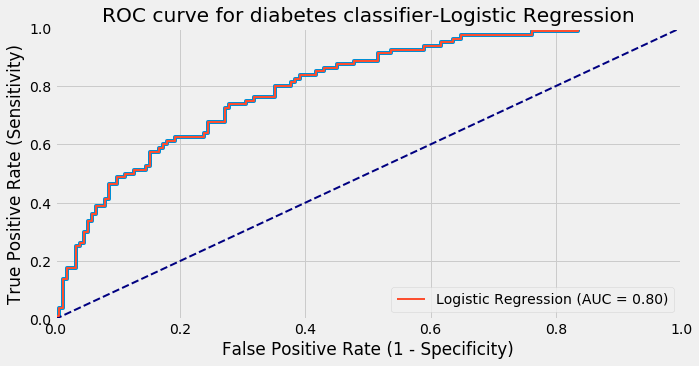

In [90]:
# ROC CURVE FOR LOGISTIC REGRESSION MODEL

from sklearn.metrics import roc_curve, auc

# function roc_curve
# input: IMPORTANT: first argument is true values, second argument is predicted probabilities
#                   we do not use y_pred_class, because it will give incorrect results without 
#                   generating an error
# output: FPR, TPR, thresholds
# FPR: false positive rate
# TPR: true positive rate
save_predictions_proba = model_LR.predict_proba(xtest)[:, 1]
FPR, TPR, thresholds = roc_curve(ytest, save_predictions_proba)

plt.figure(figsize=(10,5))  # figsize in inches
plt.plot(FPR, TPR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 50%  
plt.plot(FPR, TPR, lw=2, label='Logistic Regression (AUC = %0.2f)' % auc(FPR, TPR))
plt.title('ROC curve for diabetes classifier-Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")

In [171]:
precision1 = precision_score(ytest, yprediction1)
print('Precision_LogisticRegression: %f' % precision1)

recall1 = recall_score(ytest, yprediction1)
print('Recall_LogisticRegression: %f' % recall1)

auc1 = roc_auc_score(ytest, yprediction1)
print('ROC AUC_LogisticRegression: %f' % auc1)

Precision_LogisticRegression: 0.672131
Recall_LogisticRegression: 0.512500
ROC AUC_LogisticRegression: 0.690025


## 6.2 ROC Curve - K-Nearest Neighbors (KNN)

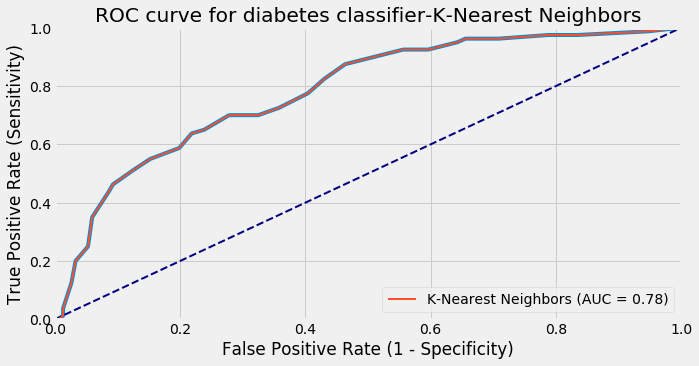

In [183]:
# ROC CURVE FOR K-Nearest Neighbors (KNN) MODEL

from sklearn.metrics import roc_curve, auc

# function roc_curve
# input: IMPORTANT: first argument is true values, second argument is predicted probabilities
#                   we do not use y_pred_class, because it will give incorrect results without 
#                   generating an error
# output: FPR, TPR, thresholds
# FPR: false positive rate
# TPR: true positive rate
save_predictions_proba_KNN = model_KNN.predict_proba(xtest)[:, 1]
FPR, TPR, thresholds = roc_curve(ytest, save_predictions_proba_KNN)

plt.figure(figsize=(10,5))  # figsize in inches
plt.plot(FPR, TPR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 50%  
plt.plot(FPR, TPR, lw=2, label='K-Nearest Neighbors (AUC = %0.2f)' % auc(FPR, TPR))
plt.title('ROC curve for diabetes classifier-K-Nearest Neighbors')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")

In [185]:
precision2 = precision_score(ytest, yprediction2)
print('Precision_KNN: %f' % precision2)

recall2 = recall_score(ytest, yprediction2)
print('Recall_KNN: %f' % recall2)

auc2 = roc_auc_score(ytest, yprediction2)
print('ROC AUC_KNN: %f' % auc2)

Precision_KNN: 0.725490
Recall_KNN: 0.462500
ROC AUC_KNN: 0.684892


## 6.3 ROC Curve - Support Vector Machines (SVM)

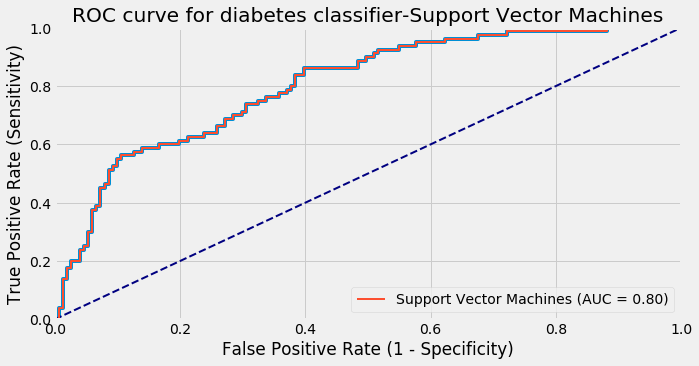

In [178]:
# ROC CURVE FOR SUPPORT VECTOR MACHINES MODEL

from sklearn.metrics import roc_curve, auc

# function roc_curve
# input: IMPORTANT: first argument is true values, second argument is predicted probabilities
#                   we do not use y_pred_class, because it will give incorrect results without 
#                   generating an error
# output: FPR, TPR, thresholds
# FPR: false positive rate
# TPR: true positive rate
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(xtrain,ytrain)
save_predictions_proba_svm = modelSVMrbf.predict_proba(xtest)[:, 1]
FPR, TPR, thresholds = roc_curve(ytest, save_predictions_proba_svm)

plt.figure(figsize=(10,5))  # figsize in inches
plt.plot(FPR, TPR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 50%  
plt.plot(FPR, TPR, lw=2, label='Support Vector Machines (AUC = %0.2f)' % auc(FPR, TPR))
plt.title('ROC curve for diabetes classifier-Support Vector Machines')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")

In [173]:
precision3 = precision_score(ytest, yprediction3)
print('Precision_SVM: %f' % precision3)

recall3 = recall_score(ytest, yprediction3)
print('Recall_SVM: %f' % recall3)

auc3 = roc_auc_score(ytest, yprediction3)
print('ROC AUC_SVM: %f' % auc3)

Precision_SVM: 0.661972
Recall_SVM: 0.587500
ROC AUC_SVM: 0.714280


## 6.4 ROC Curve - Random Forest

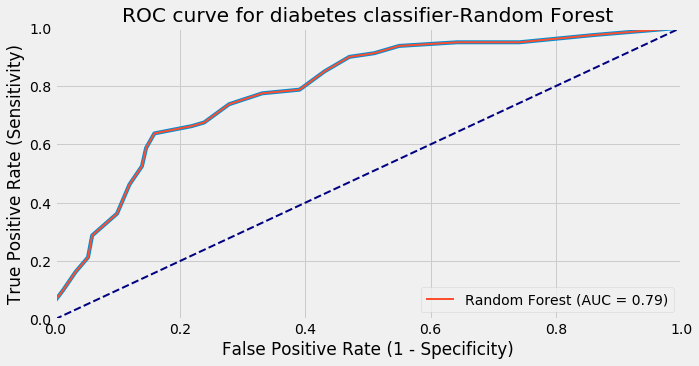

In [179]:
# ROC CURVE FOR RANDOM FOREST MODELS

from sklearn.metrics import roc_curve, auc

# function roc_curve
# input: IMPORTANT: first argument is true values, second argument is predicted probabilities
#                   we do not use y_pred_class, because it will give incorrect results without 
#                   generating an error
# output: FPR, TPR, thresholds
# FPR: false positive rate
# TPR: true positive rate
save_predictions_proba_rf = model_RF.predict_proba(xtest)[:, 1]
FPR, TPR, thresholds = roc_curve(ytest, save_predictions_proba_rf)

plt.figure(figsize=(10,5))  # figsize in inches
plt.plot(FPR, TPR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 50%  
plt.plot(FPR, TPR, lw=2, label='Random Forest (AUC = %0.2f)' % auc(FPR, TPR))
plt.title('ROC curve for diabetes classifier-Random Forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")

In [174]:
precision6 = precision_score(ytest, yprediction6)
print('Precision_RandomForest: %f' % precision6)

recall6 = recall_score(ytest, yprediction6)
print('Recall_Randomforest: %f' % recall6)

auc6 = roc_auc_score(ytest, yprediction6)
print('ROC AUC_RandomForest: %f' % auc6)

Precision_RandomForest: 0.680000
Recall_Randomforest: 0.637500
ROC AUC_RandomForest: 0.739280


## 6.5 Model Performance - AUC ROC Summary

In [204]:
# Initialise data of lists
data3 = {'Model':['Logistic Regression', 'K Nearest Neighbors','Support Vector Machines', 'Random Forest'],
          'Precision':[precision1, precision2, precision3, precision6],
          'Recall':[recall1, recall2, recall3, recall6],
          'AUC':[auc1, auc2, auc3, auc6]}

# Create the DataFrame
model_summary3 = pd.DataFrame(data3, index=[1,2,3,4])
model_summary3

,Model,Precision,Recall,AUC
1,Logistic Regression,0.672131,0.5125,0.690025
2,K Nearest Neighbors,0.725490,0.4625,0.684892
3,Support Vector Machines,0.661972,0.5875,0.714280
4,Random Forest,0.680000,0.6375,0.739280


## Results and Conclusion

### First, a few definitions are needed to understand the results.

### 1. Recall
Recall is the number of correct predictions compared to the total number of correct items in the set. (correct predictions / total number of correct items) = (correct predictions / (correct predictions + correct items not predicted)) = (true positives / (true positives + false negatives)). 

In other words, recall shows how good the model is at picking the correct items.

### 2. Precision
Precision is the number of correct predictions compared to the total number of predictions. (correct predictions / total number of predictions) = (correct predictions / (correct predictions + incorrect predictions)) = (true positives / (true positives + false positives)).

In other words, precision shows how correct the model is at whatever it predicted.

### 3. Two Types of Statistical Errors
In statistical hypothesis testing, there are two types of errors. A Type 1 error occurs when a false hypothesis is accepted (wrongly). This is also known as a "false positive". A Type 2 error occurs when a true hypothesis is rejected (wrongly). This is also known as a "false negative".

### 4. AUC ROC - Area Under the Curve (AUC) - Receiver Operating Characteristics curve (ROC)
The Receiver Operating Characteristics curve (ROC) is a probability curve. The Area Under the Curve (AUC) is the degree or measure of separability. It shows how well the model can tell the difference between two types of items. If the AUC is higher, the model is better at telling the difference between two types of items. In this case, a higher AUC means the model is better at telling the difference between a person who has diabetes and a person who does not.

Although the Random Forest model has the highest Recall (recall = 0.6375) and ability to distinguish between two different items (AUC = 0.739280), the K Nearest Neighbors model has the highest Precision (precision = 0.725490). In this case of medical diagnosis, Precision is more important. This is because it is more critical to try to "catch" as many cases of diabetes in the larger population as possible, even though some of those attempted "catches" (that is, predictions) may be wrong (that is, a type 1 error). It is less important to achieve the highest percentage of correct predictions (ie, highest recall) and try to avoid predicting wrongly (that is, a type 2 error). This is because we don't want to miss someone who has diabetes by being conservative with our testing.

## Conclusion: Because Precision is more important than Recall for disease diagnosis, we should choose the K Nearest Neighbors model to predict whether a person has diabetes.